In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/Desktop/ML_Project_B`


In [2]:
using CSV
using ScikitLearn, RDatasets, DataFrames

In [3]:
file_path = "Data/framingham.csv"

"Data/framingham.csv"

In [4]:
data = CSV.read(file_path, DataFrame)

data_cleaned = dropmissing(data)

Row,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
,Int64,Int64,String3,Int64,String3,String3,Int64,Int64,Int64,String3,Float64,Float64,String7,String3,String3,Int64
1,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
2,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
3,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
4,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
5,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.1,85,85,0
6,0,43,2,0,0,0,0,1,0,228,180.0,110.0,30.3,77,99,0
7,0,63,1,0,0,0,0,0,0,205,138.0,71.0,33.11,60,85,1
8,0,45,2,1,20,0,0,0,0,313,100.0,71.0,21.68,79,78,0
9,1,52,1,0,0,0,0,1,0,260,141.5,89.0,26.36,76,79,0


In [5]:
println("Data Types of All Columns:")
for col in names(data_cleaned)
    println("$col: $(eltype(data_cleaned[:, col]))")
end

Data Types of All Columns:
male: Int64
age: Int64
education: String3
currentSmoker: Int64
cigsPerDay: String3
BPMeds: String3
prevalentStroke: Int64
prevalentHyp: Int64
diabetes: Int64
totChol: String3
sysBP: Float64
diaBP: Float64
BMI: String7
heartRate: String3
glucose: String3
TenYearCHD: Int64


In [6]:
select!(data_cleaned, Not(["education", "cigsPerDay","BPMeds", "totChol", "BMI", "heartRate","glucose"]))

Row,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,TenYearCHD
,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Int64
1,1,39,0,0,0,0,106.0,70.0,0
2,0,46,0,0,0,0,121.0,81.0,0
3,1,48,1,0,0,0,127.5,80.0,0
4,0,61,1,0,1,0,150.0,95.0,1
5,0,46,1,0,0,0,130.0,84.0,0
6,0,43,0,0,1,0,180.0,110.0,0
7,0,63,0,0,0,0,138.0,71.0,1
8,0,45,1,0,0,0,100.0,71.0,0
9,1,52,0,0,1,0,141.5,89.0,0


In [7]:
println("Data Types of All Columns:")
for col in names(data_cleaned)
    println("$col: $(eltype(data_cleaned[:, col]))")
end

Data Types of All Columns:
male: Int64
age: Int64
currentSmoker: Int64
prevalentStroke: Int64
prevalentHyp: Int64
diabetes: Int64
sysBP: Float64
diaBP: Float64
TenYearCHD: Int64


In [8]:
features = Array(data_cleaned[!, Not(:TenYearCHD)])

target = Array(data_cleaned[!, :TenYearCHD])

4238-element Vector{Int64}:
 0
 0
 0
 1
 0
 0
 1
 0
 0
 0
 0
 0
 0
 ⋮
 1
 0
 0
 0
 0
 0
 1
 1
 0
 0
 0
 0

In [9]:
@sk_import linear_model: LogisticRegression
simplelogistic = LogisticRegression()

PyObject LogisticRegression()

In [10]:
# Training the model 
fit!(simplelogistic, features, target)

# Viewing the learned parameters 
simplelogistic.coef_

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1×8 Matrix{Float64}:
 0.645317  0.045193  0.317785  0.829485  …  1.66541  0.0149393  -0.0146298

In [11]:
logistic_target_predict = predict(simplelogistic,features);

In [12]:
@sk_import metrics: accuracy_score
print(accuracy_score(target,logistic_target_predict))

0.8468617272298253

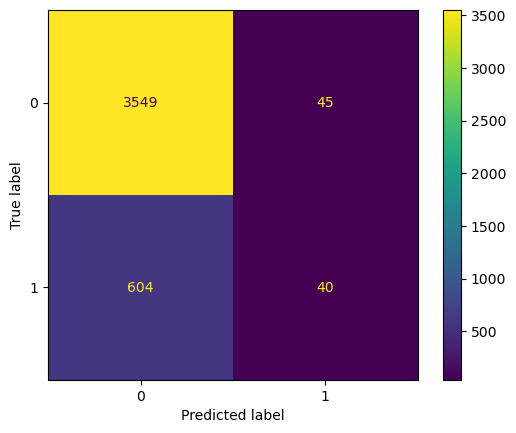

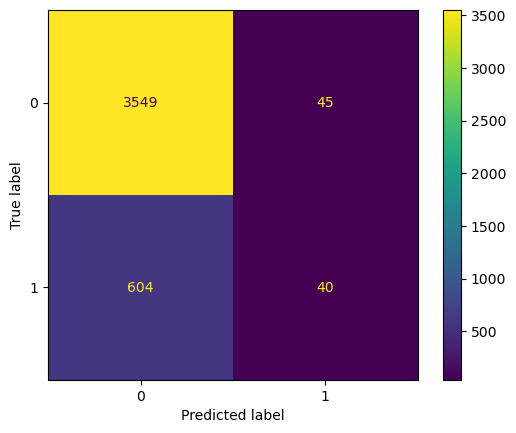

In [13]:
# Generating the confusion matrix 
@sk_import metrics: confusion_matrix
cf = confusion_matrix(target, logistic_target_predict)

# Loading the plotting library & confusion matrix plotting function
using PyPlot
@sk_import metrics: ConfusionMatrixDisplay

figure() # Open a new canvas to plot

# Generating the plot 
disp = ConfusionMatrixDisplay(confusion_matrix=cf,
            display_labels=simplelogistic.classes_)
disp.plot() # Transferring the plot to the canvas
gcf() # Freezing the canvas and printing it.

In [14]:
true_neg, false_neg, false_pos, true_pos = cf
recall = true_pos / (true_pos + false_neg)

0.062111801242236024

In [15]:
precision = true_pos / (true_pos + false_pos)

0.47058823529411764

In [16]:
f1 = (2 * precision * recall) / (precision + recall)

0.10973936899862825

In [17]:
@sk_import metrics: classification_report
print(classification_report(target, logistic_target_predict))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      3594
           1       0.47      0.06      0.11       644

    accuracy                           0.85      4238
   macro avg       0.66      0.52      0.51      4238
weighted avg       0.80      0.85      0.79      4238


In [18]:
@sk_import model_selection: train_test_split;
features_train, features_test, 
    target_train, target_test = train_test_split(features, 
        target, test_size=0.3, random_state=42);

┌ Warning: Module model_selection has been ported to Julia - try `import ScikitLearn: CrossValidation` instead
└ @ ScikitLearn.Skcore ~/.julia/packages/ScikitLearn/sqLdT/src/Skcore.jl:259


In [19]:
using ScikitLearn.CrossValidation: train_test_split

# Example usage
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.3, random_state=42
)


4-element Vector{Array}:
 [0.0 42.0 … 135.0 90.0; 0.0 64.0 … 160.0 87.0; … ; 1.0 39.0 … 102.0 64.5; 0.0 35.0 … 107.0 73.0]
 [1.0 63.0 … 148.0 90.0; 1.0 45.0 … 125.0 89.0; … ; 0.0 42.0 … 115.0 72.0; 0.0 42.0 … 126.0 86.0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 1  …  0, 0, 0, 0, 0, 1, 0, 1, 0, 0]

In [20]:
@sk_import linear_model: LogisticRegression;
simplelogistic = LogisticRegression(max_iter=1000);

fit!(simplelogistic, features_train, target_train);

In [21]:
logistic_target_predict_training = 
    predict(simplelogistic,features_train);

@sk_import metrics: classification_report
print(classification_report(target_train,
                     logistic_target_predict_training))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2510
           1       0.59      0.05      0.10       456

    accuracy                           0.85      2966
   macro avg       0.72      0.52      0.51      2966
weighted avg       0.81      0.85      0.79      2966


In [22]:
logistic_target_predict_test = 
    predict(simplelogistic,features_test);

@sk_import metrics: classification_report
print(classification_report(target_test,
                     logistic_target_predict_test))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1084
           1       0.56      0.05      0.09       188

    accuracy                           0.85      1272
   macro avg       0.71      0.52      0.50      1272
weighted avg       0.81      0.85      0.80      1272


In [23]:
@sk_import model_selection: KFold
@sk_import model_selection: cross_validate

cv_results = cross_validate(simplelogistic, 
        features_train, target_train, 
            cv=KFold(5),
            return_estimator=true,
            return_train_score=true, 
            scoring=["accuracy",
                 "recall_weighted", "precision_weighted"]);

┌ Warning: Module model_selection has been ported to Julia - try `import ScikitLearn: CrossValidation` instead
└ @ ScikitLearn.Skcore ~/.julia/packages/ScikitLearn/sqLdT/src/Skcore.jl:259
┌ Warning: Module model_selection has been ported to Julia - try `import ScikitLearn: CrossValidation` instead
└ @ ScikitLearn.Skcore ~/.julia/packages/ScikitLearn/sqLdT/src/Skcore.jl:259


In [24]:
cv_df = DataFrame(cv_results)[!, 
        Not([:estimator, :fit_time, :score_time])]

rename!(cv_df, ["Test Accuracy",
                "Test Precision",
                "Test Recall",
                "Train Accuracy",
                "Train Precision",
                "Train Recall"])

Row,Test Accuracy,Test Precision,Test Recall,Train Accuracy,Train Precision,Train Recall
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.850168,0.786732,0.850168,0.849073,0.816889,0.849073
2,0.856661,0.848663,0.856661,0.84745,0.811753,0.84745
3,0.84317,0.807717,0.84317,0.849558,0.809593,0.849558
4,0.841484,0.774502,0.841484,0.850822,0.823228,0.850822
5,0.846543,0.811443,0.846543,0.8504,0.81955,0.8504


In [25]:
describe(cv_df)[!,[:variable, :mean]]

Row,variable,mean
,Symbol,Float64
1,Test Accuracy,0.847605
2,Test Precision,0.805811
3,Test Recall,0.847605
4,Train Accuracy,0.849461
5,Train Precision,0.816202
6,Train Recall,0.849461


In [26]:
@sk_import model_selection: learning_curve;
lc_results = learning_curve(simplelogistic, 
        features_train,target_train, 
            train_sizes = [0.06, 0.1, 0.25, 0.5, 0.75, 1.0]);

┌ Warning: Module model_selection has been ported to Julia - try `import ScikitLearn: CrossValidation` instead
└ @ ScikitLearn.Skcore ~/.julia/packages/ScikitLearn/sqLdT/src/Skcore.jl:259


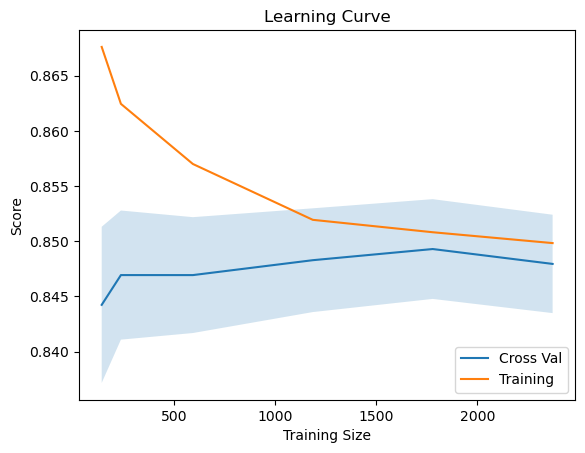

In [27]:
train_sizes, train_scores, test_scores, = 
    lc_results[1], lc_results[2], lc_results[3]

using Statistics
# Calculating the error bars 
y_ax = vec(mean(test_scores, dims=2)) 
y_err = vec(std(test_scores, dims=2))

using PyPlot
begin 
    figure();
    plot(train_sizes,
        vec(mean(test_scores, dims=2)), label="Cross Val");

    fill_between(train_sizes,
        y_ax - y_err, y_ax + y_err,alpha=0.2);

    plot(train_sizes,
        vec(mean(train_scores, dims=2)), label="Training");
    xlabel("Training Size"); 
    ylabel("Score"); 
    title("Learning Curve");
    legend(loc=4);
    gcf()
end;

In [28]:
using ScikitLearn.GridSearch: GridSearchCV
@sk_import linear_model: LogisticRegression;
gridsearch = GridSearchCV(LogisticRegression(),
            Dict(:solver => ["newton-cg", "lbfgs", "liblinear"], 
            :C => [0.01, 0.1, 0.5, 0.9]));

In [31]:
@sk_import preprocessing: StandardScaler

# Scale the data
scaler = StandardScaler()
features_train_scaled = fit_transform!(scaler, features_train)

# Fit the model with scaled data
fit!(gridsearch, features_train_scaled, target_train)


GridSearchCV
  estimator: PyCall.PyObject
  param_grid: Dict{Symbol, Vector}
  scoring: Nothing nothing
  loss_func: Nothing nothing
  score_func: Nothing nothing
  fit_params: Dict{Any, Any}
  n_jobs: Int64 1
  iid: Bool true
  refit: Bool true
  cv: Nothing nothing
  verbose: Int64 0
  error_score: String "raise"
  scorer_: score (function of type typeof(score))
  best_params_: Dict{Symbol, Any}
  best_score_: Float64 0.8486176668914363
  grid_scores_: Array{ScikitLearn.Skcore.CVScoreTuple}((12,))
  best_estimator_: PyCall.PyObject


In [32]:
search_results = DataFrame(gridsearch.grid_scores_)
hcat(DataFrame(search_results.parameters), 
            search_results)[!,Not(:parameters)]

Row,solver,C,mean_validation_score,cv_validation_scores
,String,Float64,Float64,Array…
1,newton-cg,0.01,0.848618,"[0.848332, 0.849343, 0.848178]"
2,lbfgs,0.01,0.848618,"[0.848332, 0.849343, 0.848178]"
3,liblinear,0.01,0.848618,"[0.850354, 0.847321, 0.848178]"
4,newton-cg,0.1,0.848618,"[0.849343, 0.848332, 0.848178]"
5,lbfgs,0.1,0.848618,"[0.849343, 0.848332, 0.848178]"
6,liblinear,0.1,0.848281,"[0.848332, 0.847321, 0.84919]"
7,newton-cg,0.5,0.848281,"[0.848332, 0.848332, 0.848178]"
8,lbfgs,0.5,0.848618,"[0.848332, 0.848332, 0.84919]"
9,liblinear,0.5,0.848281,"[0.848332, 0.848332, 0.848178]"


In [33]:
best_model = gridsearch.best_estimator_ 

PyObject LogisticRegression(C=0.01, solver='newton-cg')

In [34]:
best_model_predictions = predict(best_model, features_train);
first(best_model_predictions,4)

4-element Vector{Int64}:
 1
 1
 1
 1